In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import uuid
from sklearn.cluster import MeanShift, estimate_bandwidth

In [52]:
import sys
import yellowbrick
import random
import math
import os


# Import the data

In [53]:
df = pd.read_csv('attributes.txt', sep=" ", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,57109,3398,8940,9824,10586,11204,8761,4396,110,192,...,286,254,211,166,184,125,121,80,75,NaN
1,5033,437,732,706,783,849,798,728,19,41,...,74,64,45,33,39,20,25,21,17,NaN
2,1753,214,215,177,238,210,291,408,18,12,...,45,49,47,32,30,22,14,15,8,NaN
3,3886,650,362,370,644,412,485,963,26,34,...,124,100,93,83,66,49,42,34,33,NaN
4,707,107,63,61,69,81,139,187,3,8,...,23,26,17,15,19,12,13,9,7,NaN


In [54]:
df.drop(df.columns[120], axis = 1, inplace = True)

In [55]:
id = list(range(0, 99))
df['location'] = id

In [56]:
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,location
0,57109,3398,8940,9824,10586,11204,8761,4396,110,192,...,286,254,211,166,184,125,121,80,75,0
1,5033,437,732,706,783,849,798,728,19,41,...,74,64,45,33,39,20,25,21,17,1
2,1753,214,215,177,238,210,291,408,18,12,...,45,49,47,32,30,22,14,15,8,2
3,3886,650,362,370,644,412,485,963,26,34,...,124,100,93,83,66,49,42,34,33,3
4,707,107,63,61,69,81,139,187,3,8,...,23,26,17,15,19,12,13,9,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1341,160,115,167,166,152,275,306,0,10,...,25,25,18,15,10,4,7,7,6,94
95,363,58,19,43,40,44,56,103,0,3,...,11,6,5,3,4,1,7,1,0,95
96,661,139,55,71,64,69,99,164,6,5,...,27,9,15,11,7,4,2,3,4,96
97,106,19,11,11,17,12,10,26,0,1,...,1,4,2,0,3,3,1,1,1,97


In [59]:
def is_non_zero_file(fpath):  
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

In [60]:
for i in range(99):
     csvPath = "region_" + str(i) +".txt"
     if not is_non_zero_file(csvPath):
        df.drop(df.loc[df['location']==i].index, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,location
0,57109,3398,8940,9824,10586,11204,8761,4396,110,192,...,286,254,211,166,184,125,121,80,75,0
1,5033,437,732,706,783,849,798,728,19,41,...,74,64,45,33,39,20,25,21,17,1
2,1753,214,215,177,238,210,291,408,18,12,...,45,49,47,32,30,22,14,15,8,2
3,3886,650,362,370,644,412,485,963,26,34,...,124,100,93,83,66,49,42,34,33,3
4,707,107,63,61,69,81,139,187,3,8,...,23,26,17,15,19,12,13,9,7,4
5,468,51,48,41,63,70,78,117,2,1,...,9,10,9,10,2,5,4,10,2,5
10,19290,1658,2670,2930,3162,3546,3073,2251,76,110,...,213,159,123,112,90,59,56,42,32,10
13,475,57,43,66,54,48,87,120,3,3,...,8,7,7,7,3,3,1,2,0,13
20,325,33,45,49,50,50,60,38,2,5,...,7,6,2,4,3,3,2,0,0,20
22,477,73,41,54,56,51,72,130,5,5,...,16,10,9,6,8,5,2,2,4,22


# Creating the clusters

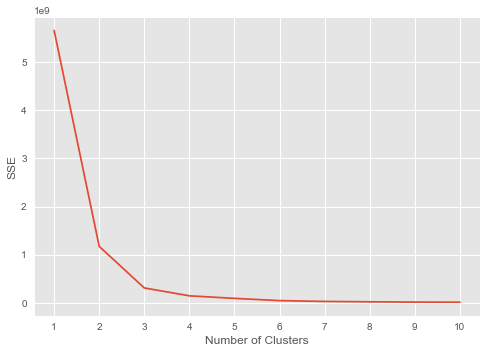

3


In [63]:
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
print(kl.knee)

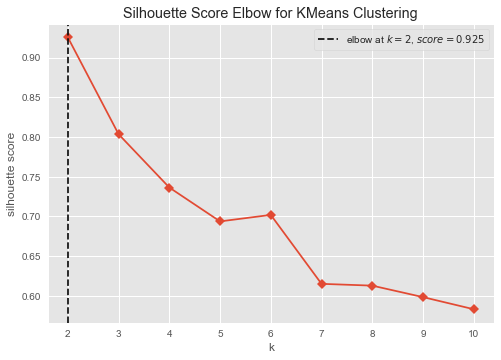

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [64]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(df)    
visualizer.poof()   

So we have 8 clusters for our 100 locations, by the best possible quantative analysis. 

In [65]:
km = KMeans(n_clusters=8).fit(df)

cluster_map = pd.DataFrame()
cluster_map['region'] = df.location
cluster_map['cluster'] = km.labels_



These are the 8 clusters. If you want more then we just simply change n_clusters=8 to something else.

In [66]:
cluster0 = cluster_map[cluster_map.cluster == 0]
cluster1 = cluster_map[cluster_map.cluster == 1]
cluster2 = cluster_map[cluster_map.cluster == 2]
cluster3 = cluster_map[cluster_map.cluster == 3]
cluster4 = cluster_map[cluster_map.cluster == 4]
cluster5 = cluster_map[cluster_map.cluster == 5]
cluster6 = cluster_map[cluster_map.cluster == 6]
cluster7 = cluster_map[cluster_map.cluster == 7]

# Creating the random locations inside each region

In [67]:
lat = [38.214710000000004, 38.219295, 38.22388, 38.228465, 38.23305, 38.237635, 38.24222, 38.246805, 38.25139, 38.255975, 38.26056]
log = [-85.75636, -85.751104, -85.745848, -85.740592, -85.735336, -85.73008, -85.724824, -85.719568, -85.714312, -85.709056, -85.7038]

In [68]:
location = 0
randomLocation = list()
randLat = 0
randLog = 0
for i in range (10):
    for j in range(10):
        randLat = random.uniform(lat[i], lat[i+1])
        randLog= random.uniform(log[i], log[i+1])
        randomLocation.append([location, randLat,randLog])
        location = location + 1
randLocs = pd.DataFrame(randomLocation, columns = ['region', 'lat',  'log'])


In [69]:
randLocs.to_csv('randomLocations.csv', index = False)

In [71]:
print (len(cluster_map[cluster_map.cluster == 0]))
print (len(cluster_map[cluster_map.cluster == 1]))
print (len(cluster_map[cluster_map.cluster == 2]))
print (len(cluster_map[cluster_map.cluster == 3]))
print (len(cluster_map[cluster_map.cluster == 4]))
print (len(cluster_map[cluster_map.cluster == 5]))
print (len(cluster_map[cluster_map.cluster == 6]))
print (len(cluster_map[cluster_map.cluster == 7]))


33
1
2
3
12
1
3
5


In [72]:
cluster0

,region,cluster
4,4,0
5,5,0
13,13,0
20,20,0
22,22,0
23,23,0
24,24,0
30,30,0
31,31,0
32,32,0


# Finding the True minDistance and the approximation

In [74]:
#the one where you calculate the distance from the ending location of that trip in that region and a random point in the region
#and take the average as minDist
def minDistance(region):
    csvPath = "region_" + str(region) +".txt"
    if is_non_zero_file(csvPath):
        regionDF = pd.read_csv(csvPath, sep=" ", header=None)
    else:
        return -1
    list_of_rows = [list(row) for row in regionDF.values]
    distList = []
    for row in list_of_rows:
        try:
            dist = eucledianDistance(float(row[7]),float(row[8]),randomLocation[region][1],randomLocation[region][2])
            if(not math.isnan(dist)):
                distList.append(dist)
        except:
            #bad input
            pass
    return sum(distList)/len(distList)

#the one where youe take the average of all the ending locations in that region and find distance between that and a 
# random point in that region
def minDistanceApprox(region):
    csvPath = "region_" + str(region) +".txt"
    if is_non_zero_file(csvPath):
        regionDF = pd.read_csv(csvPath, sep=" ", header=None)
    else:
        return -1
    list_of_rows = [list(row) for row in regionDF.values]
    7 and 8 
    minDist = 100000000
    latSum = 0
    logSum = 0
    count = 0
    for row in list_of_rows:
        oldLatSum = latSum
        oldLogSum = logSum
        try:
            latSum = latSum + float(row[7])
        except ValueError:
            latSum = latSum + (latSum/count)
        try:
            logSum = logSum + float(row[8])
        except ValueError:
            logSum = logSum + (logSum/count)
        count = count +1
        if math.isnan(logSum):
            logSum = oldLogSum
            latSum = oldLatSum
            count = count -1
        elif math.isnan(latSum):
            logSum = oldLogSum
            latSum = oldLatSum
            count = count -1
    avgLat = latSum/count
    avgLog = logSum/count
    
    dist = eucledianDistance(avgLat,avgLog,randomLocation[region][1],randomLocation[region][2])
    return dist

#helper function
def eucledianDistance(x2,y2, x1,y1):
    try:
        return math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    except:
        return -1

    
#outer function. set Truth to False if you want approx, set Truth to True if you want real
def clusterMinDistance(cluster, threshold, truth):
    list_of_rows = [list(row) for row in cluster.values]
    regionsSeen = []
    
    for row in list_of_rows:
        if len(regionsSeen) >= len(cluster) * threshold:
            break
        if truth:
            val = minDistance(row[0])
        else: 
            val = minDistanceApprox(row[0])
        #file is empty so technically not really added to threshold
        if val > -1:
            regionsSeen.append(val)
    return regionsSeen



In [116]:
truthRegionList = []
regionList = range(100)
for i in regionList:
    val = minDistance(i)
    if val > -1:
        if i in cluster0.region:
            truthRegionList.append([i,minDistance(i),0])
        elif i in cluster1.region:
            truthRegionList.append([i, minDistance(i),1])
        elif i in cluster2.region:
            truthRegionList.append([i, minDistance(i),2])
        elif i in cluster3.region:
            truthRegionList.append([i, minDistance(i),3])
        elif i in cluster4.region:
            truthRegionList.append([i, minDistance(i),4])
        elif i in cluster5.region:
            truthRegionList.append([i, minDistance(i),5])
        elif i in cluster6.region:
            truthRegionList.append([i, minDistance(i),6])
        elif i in cluster7.region:
            truthRegionList.append([i, minDistance(i),7])



In [109]:
print(len(truthRegionList))

60


In [143]:
approxRegionList = []
regionList = range(100)
for i in regionList:
    val = minDistance(i)
    if val > -1:
        if i in cluster0.region:
            approxRegionList.append([i,minDistanceApprox(i),0])
        elif i in cluster1.region:
            approxRegionList.append([i, minDistanceApprox(i),1])
        elif i in cluster2.region:
            approxRegionList.append([i, minDistanceApprox(i),2])
        elif i in cluster3.region:
            approxRegionList.append([i, minDistance(i),3])
        elif i in cluster4.region:
            approxRegionList.append([i, minDistance(i),4])
        elif i in cluster5.region:
            approxRegionList.append([i, minDistance(i),5])
        elif i in cluster6.region:
            approxRegionList.append([i, minDistance(i),6])
        elif i in cluster7.region:
            approxRegionList.append([i, minDistance(i),7])

print(len(approxRegionList))


60


In [146]:
#to sort them with the desired attributes
approxRegionList.sort( key = lambda region: region[2])
approxRegionList.sort( key = lambda region: region[1])
truthRegionList.sort( key = lambda region: region[2])
truthRegionList.sort( key = lambda region: region[1])


In [147]:
def findMin(regionList, cluster):
    for row in regionList:
        if row[2] == cluster:
            return row[1]
        
def findAvg(regionList, cluster):
    startSaving = False
    saved = []
    for row in regionList:
        if row[2] == cluster:
            startSaving = True
            saved.append(row[1])
        elif startSaving and row[2] != cluster:
            break
    return sum(saved)/ len(saved)

In [148]:
findAvg(approxRegionList,6)

0.03570034195068223

In [151]:
numOfClusters =8
truePoints = []
for i in range(numOfClusters):
    truePoints.append([findMin(truthRegionList,i), findAvg(truthRegionList,i)])

approxPoints = []
for i in range(numOfClusters):
    approxPoints.append([findMin(approxRegionList,i), findAvg(approxRegionList,i)])
truePoints

[[0.002252906309067509, 0.002252906309067509],
 [0.006724597116671742, 0.006724597116671742],
 [0.03127442988329383, 0.03127442988329383],
 [0.002777043288184665, 0.002777043288184665],
 [0.009451434955296493, 0.009451434955296493],
 [0.017972895945380665, 0.017972895945380665],
 [0.03570034195068223, 0.03570034195068223],
 [0.008262181795436321, 0.008262181795436321]]

In [152]:
approxPoints

[[0.0018289797011770033, 0.0018289797011770033],
 [0.005291334427129604, 0.005291334427129604],
 [0.03125985115935704, 0.03125985115935704],
 [0.002777043288184665, 0.002777043288184665],
 [0.009451434955296493, 0.009451434955296493],
 [0.017972895945380665, 0.017972895945380665],
 [0.03570034195068223, 0.03570034195068223],
 [0.008262181795436321, 0.008262181795436321]]